In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
senate_df = pd.read_csv("https://drive.google.com/uc?id=1mMSM9bfu4SxeRDvGsM32eU4Cb6t80cj9")
senate_df = senate_df.drop("Unnamed: 0", axis = 1)

File was too large so I had to split up the CSV

In [3]:
rep_df_one = pd.read_csv("https://drive.google.com/uc?id=1xPTbtPQozq4wU43TU8iBXrnSnZTVeoMq")
rep_df_two = pd.read_csv("https://drive.google.com/uc?id=1HWIbkxPReQDAhDIiuPlGTK6kq1TTJseM")
rep_df_three = pd.read_csv("https://drive.google.com/uc?id=1C0-BVLXd9LjYTXkjJ_rUCsOQx46itrv9")
rep_df = pd.concat([rep_df_one, rep_df_two, rep_df_three], ignore_index=True).drop("Unnamed: 0", axis=1)

In [4]:
rep_df["Text"] = rep_df["Text"].str.replace("\n\n", " ")
rep_df["Text"] = rep_df["Text"].str.replace("\n", " ")
rep_df["Text"] = rep_df["Text"].str.split("https").str[0]
senate_df["Text"] = senate_df["Text"].str.replace("\n\n", " ")
senate_df["Text"] = senate_df["Text"].str.replace("\n", " ")
senate_df["Text"] = senate_df["Text"].str.split("https").str[0]

In [5]:
senate_info = pd.read_csv("https://raw.githubusercontent.com/kyleschmoyer/DataSci/main/senate_info-3.csv")
rep_info = pd.read_csv("https://raw.githubusercontent.com/kyleschmoyer/DataSci/main/rep_info-3.csv")
senate_info.loc[88, "State"] = "Vermont"

In [6]:
senate_comb = senate_df.merge(
    senate_info,
    left_on="User",
    right_on="Twitter").drop("Twitter", axis = 1)
senate_comb["Date"] = pd.to_datetime(senate_comb["Date"], format='%Y-%m-%d').dt.date

In [7]:
rep_comb = rep_df.merge(
    rep_info,
    left_on="User",
    right_on="Twitter").drop("Twitter", axis = 1)
rep_comb["Date"] = pd.to_datetime(rep_comb["Date"], format='%Y-%m-%d').dt.date

In [8]:
senate_comb

,User,Text,Hashtag,Lang,Likes,Retweets,Quotes,MentionedUsers,Date,Name,Party,State,Start
0,SenKatieBritt,I was grateful to meet with representatives fr...,NaN,en,45,4,0,NaN,2023-03-17,Katie Britt,Republican Party,Alabama,2023-01-03
1,SenKatieBritt,Our nation’s banking system remains strong — i...,NaN,en,24,1,2,NaN,2023-03-17,Katie Britt,Republican Party,Alabama,2023-01-03
2,SenKatieBritt,I join @BankingGOP Ranking Member @SenatorTimS...,NaN,en,57,7,2,"[User(username='BankingGOP', id=1242040290, di...",2023-03-16,Katie Britt,Republican Party,Alabama,2023-01-03
3,SenKatieBritt,"Alabamians want answers, and we deserve answer...",NaN,en,114,19,5,NaN,2023-03-16,Katie Britt,Republican Party,Alabama,2023-01-03
4,SenKatieBritt,I was excited to visit with students from Mont...,NaN,en,79,12,0,"[User(username='SenTuberville', id=13457391937...",2023-03-16,Katie Britt,Republican Party,Alabama,2023-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92675,SenLummis,"Right now, we need an agreement on allowing am...",NaN,en,2141,182,9,NaN,2021-08-09,Cynthia Lummis,Republican Party,Wyoming,2021-01-03
92676,SenLummis,This has been an interesting day. Here’s what ...,NaN,en,12948,1999,191,NaN,2021-08-09,Cynthia Lummis,Republican Party,Wyoming,2021-01-03
92677,SenLummis,The Senate has the opportunity to set the stag...,NaN,en,9039,1354,62,NaN,2021-08-08,Cynthia Lummis,Republican Party,Wyoming,2021-01-03
92678,SenLummis,We should ensure that people aren’t trying to ...,NaN,en,10082,1278,98,NaN,2021-08-08,Cynthia Lummis,Republican Party,Wyoming,2021-01-03


Axes(0.125,0.125;0.775x0.755)
Party
Democratic Party     562.223822
Independent         4842.488667
Republican Party     480.402291
Name: Likes, dtype: float64


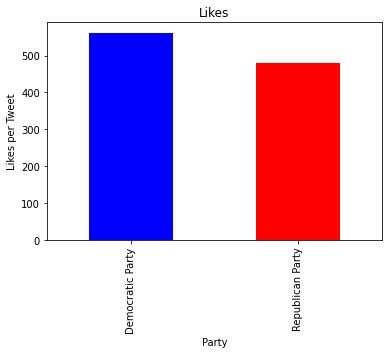

In [16]:
print(senate_comb[senate_comb["Party"].isin(["Republican Party", "Democratic Party"])].groupby("Party")["Likes"].mean().plot.bar(ylabel="Likes per Tweet",
                                                                                                                                 title = "Likes",
                                                                                                                                 color = ["Blue", "Red"]))
print(senate_comb.groupby("Party")["Likes"].mean())

              Name        Party    State       Start        Twitter
5   Kyrsten Sinema  Independent  Arizona  2019-01-03  senatorsinema
37      Angus King  Independent    Maine  2013-01-03   SenAngusKing
88  Bernie Sanders  Independent  Vermont  2019-01-03     SenSanders
Axes(0.125,0.125;0.775x0.755)


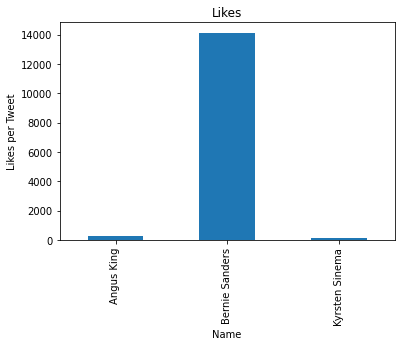

In [12]:
print(senate_info[senate_info["Party"] == "Independent"])
print(senate_comb[senate_comb["Party"] == "Independent"].groupby("Name")["Likes"].mean().plot.bar(ylabel = "Likes per Tweet", title = "Likes"))

Axes(0.125,0.125;0.775x0.755)
Party
Democratic Party    109.880912
Independent         785.038667
Republican Party     99.630328
Name: Retweets, dtype: float64


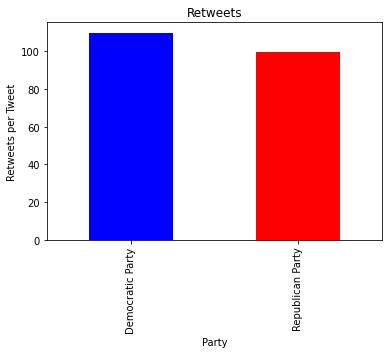

In [17]:
print(senate_comb[senate_comb["Party"] != "Independent"].groupby("Party")["Retweets"].mean().plot.bar(ylabel = "Retweets per Tweet", title = "Retweets", color = ["Blue", "Red"]))
print(senate_comb.groupby("Party")["Retweets"].mean())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
counts = vec.fit_transform(senate_comb[senate_comb["Party"] == "Republican Party"]["Text"])
df_counts = pd.DataFrame(counts.toarray(), columns=vec.get_feature_names_out())
common_words_r = df_counts.sum().sort_values(ascending=False)

counts = vec.fit_transform(senate_comb[senate_comb["Party"] == "Democratic Party"]["Text"])
df_counts = pd.DataFrame(counts.toarray(), columns=vec.get_feature_names_out())
common_words_d = df_counts.sum().sort_values(ascending=False)


access 2221
costs 2147
jobs 2079
ll 1973
climate 1970
pass 1917
rights 1911
funding 1850
public 1700
let 1684
workers 1672
big 1661
fight 1660
republicans 1631
fighting 1581
thanks 1504
gun 1406
passed 1402
violence 1388
future 1364
forward 1363
court 1355
critical 1290
lower 1289
action 1279
reduction 1273
sure 1267
long 1265
clean 1258
done 1229
justice 1213
news 1198
abortion 1188
after 1181
better 1178
vote 1173
making 1154
join 1145
step 1140
plan 1122
going 1111
local 1098
safety 1098
resources 1097


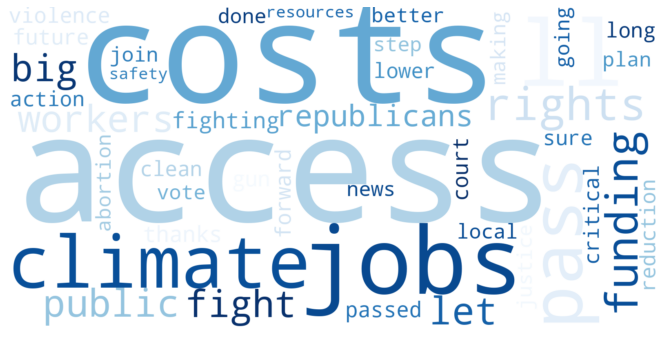

In [ ]:
from wordcloud import WordCloud
words_dem = ""
i = 200
for word in common_words_d.head(200).index:
  if word not in common_words_r.head(200):
    print(word, common_words_d[word])
    for i in range(common_words_d[word]):
      words_dem += word + " "

plt.figure(figsize=(12,6))
word_cloud = WordCloud(collocations = False, width = 1600, height = 800,  background_color = 'white', colormap = "Blues").generate(words_dem)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


border 3660
administration 2331
democrats 2058
spending 1818
policies 1539
china 1476
prices 1393
senator 1366
covid 1319
high 1303
gas 1231
government 1204
southern 1116
admin 1070
needs 1037
military 1029
states 1024
through 1005
only 1002
had 967
ukraine 957
being 951
read 951
want 922
were 919
illegal 907
office 895
most 887
students 879
down 877
businesses 876
members 873
best 868
provide 859
small 859
discuss 852
hawley 848
colleagues 836
economic 827
000 826
secure 826
don 825
because 815
alaska 814


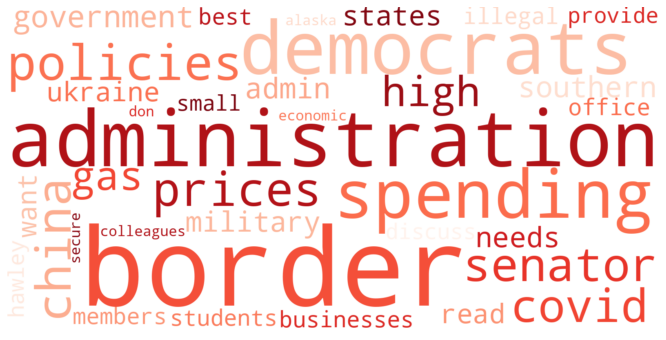

In [ ]:
from wordcloud import WordCloud
words_dem = ""
i = 200
for word in common_words_r.head(200).index:
  if word not in common_words_d.head(200):
    print(word, common_words_r[word])
    for i in range(common_words_r[word]):
      words_dem += word + " "

plt.figure(figsize=(12,6))
word_cloud = WordCloud(collocations = False, width = 1600, height = 800,  background_color = 'white', colormap = "Reds").generate(words_dem)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
for word in common_words_r.head(100).index:
  if word not in common_words_d.head(100):
    print(word, common_words_r[word])

biden 7345
border 3660
energy 3169
president 2904
inflation 2484
administration 2331
he 2240
america 2097
national 2084
democrats 2058
what 2022
nation 1886
spending 1818
would 1791
than 1745
crisis 1724
security 1720
over 1635
if 1556
policies 1539


In [ ]:
repub_hashtag = senate_comb[senate_comb["Party"] == "Republican Party"]["Hashtag"].explode()
print(repub_hashtag.value_counts().head(20))

['BidenBorderCrisis']           306
['WickerReport']                177
['SOTU']                        141
['Bidenflation']                138
['99countymeetings']            105
['Kentucky']                     95
['Bluegrass120']                 78
['BidenFlation']                 69
['SCOTUS']                       58
['ARinDC']                       48
['BlackHistoryMonth']            43
['BeijingBehavingBadly']         41
['Kentucky', 'Bluegrass120']     37
['VeteransDay']                  36
['MarkerMonday']                 35
['CCP']                          35
['FoxNews']                      35
['NDag']                         33
['ICYMI']                        33
['NDAA']                         32
Name: Hashtag, dtype: int64


In [ ]:
dem_hashtag = senate_comb[senate_comb["Party"] == "Democratic Party"]["Hashtag"].explode()
print(dem_hashtag.value_counts().head(20))

['BlackHistoryMonth']        141
['SOTU']                     132
['InflationReductionAct']    114
['WV']                       109
['RoeVWade']                 108
['AmericanRescuePlan']        97
['PACTAct']                   91
['CancelStudentDebt']         83
['HispanicHeritageMonth']     69
['PAMapSpotlight']            64
['WomensHistoryMonth']        57
['ChildTaxCredit']            52
['Juneteenth']                52
['TeamRosen']                 51
['SCOTUS']                    43
['BuildBackBetter']           40
['MLKDay']                    38
['MadeinWI']                  38
['GetCovered']                38
['PROAct']                    37
Name: Hashtag, dtype: int64


In [ ]:
dem_mention = senate_comb[senate_comb["Party"] == "Democratic Party"]["MentionedUsers"].explode()
for i in range(20):
  user = dem_mention.value_counts().index[i]
  spot = user.find("displayname='")
  print(user[spot+13:user.find("'", spot + 15)], dem_mention.value_counts()[i])

President Biden 1433
Jon Ossoff 431
U.S. EPA 118
Senate Democrats 102
U.S. Postal Service 86
Veterans Affairs 57
Dept. of Agriculture 56
Senate Judiciary Committee 49
SBA 47
Nancy Pelosi 47
HHS.gov 45
Jon Ossoff 42
U.S. FDA 41
Department of Defense 🇺🇸 38
FTC 37
Senator Reverend Raphael Warnock 36
Sheldon Whitehouse 34
Vice President Kamala Harris 34
Sen. Susan Collins 34
TransportationGov 34


In [ ]:
rep_mention = senate_comb[senate_comb["Party"] == "Republican Party"]["MentionedUsers"].explode()
for i in range(20):
  user = rep_mention.value_counts().index[i]
  spot = user.find("displayname='")
  print(user[spot+13:user.find("'", spot + 15)], rep_mention.value_counts()[i])

President Biden 691
Joe Biden 501
Leader McConnell 397
The Wall Street Journal 95
Senate Republicans 71
Chuck Grassley 52
FOX Business 50
Fox News 47
Dept. of Agriculture 45
SASC GOP 45
Wall Street Journal Opinion 44
Senator Joe Manchin 40
U.S. Marines 39
U.S. Army 39
Secretary Alejandro Mayorkas 38
Senate Commerce Republicans 37
U.S. Navy 37
Chuck Schumer 36
Department of Defense 🇺🇸 34
CBP 34


In [ ]:
dem_mention = senate_comb[senate_comb["Name"] == "Jon Ossoff"]["MentionedUsers"].explode()
i=0
user = dem_mention.value_counts().index[i]
spot = user.find("displayname='")
print(user[spot+13:user.find("'", spot + 15)], dem_mention.value_counts()[i])

Jon Ossoff 426


<ipython-input-20-15d6ef1785ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # convert date column to datetime format


<Figure size 864x432 with 0 Axes>

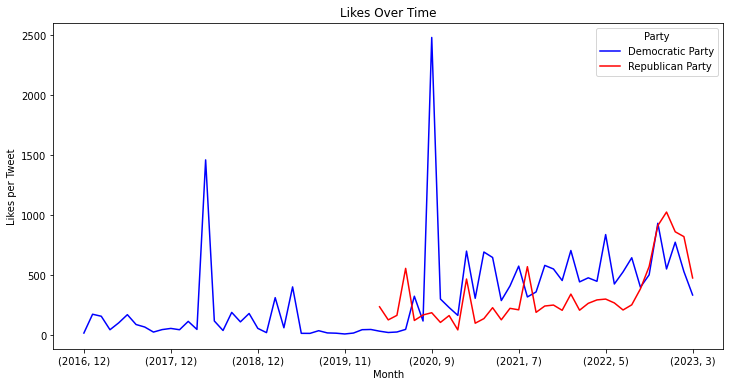

<Figure size 864x432 with 0 Axes>

In [20]:
df = senate_comb[senate_comb["Party"] != "Independent"]
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # convert date column to datetime format


plt.figure(figsize=(12,6))
df.groupby([df['Date'].dt.year, df['Date'].dt.month, "Party" ])["Likes"].mean().unstack("Party").plot.line(color = ["blue", "red"], xlabel = "Month", ylabel = "Likes per Tweet", title = "Likes Over Time", figsize=(12,6))
plt.figure(figsize=(12,6))

plt.show()


In [21]:
!pip install calmap
import calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2020


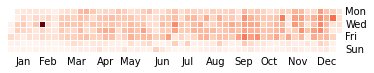

2021


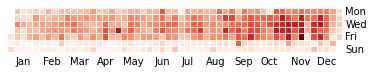

2022


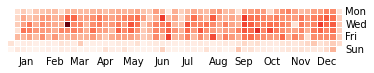

2023


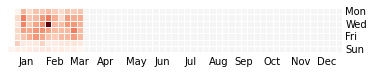

In [25]:
dates = pd.Series(pd.to_datetime(rep_comb[rep_comb["Party"] == "Republican Party"]['Date']))
for i in range(2020, 2024):
  print(i)
  calmap.yearplot(dates[dates.dt.year == i].value_counts(), dayticks=[0, 2, 4, 6],)
  plt.show()


2020


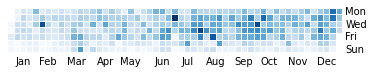

2021


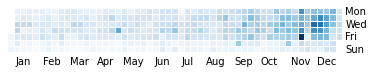

2022


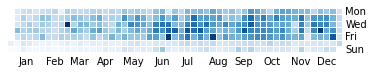

2023


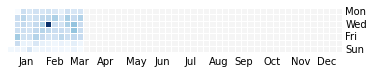

In [26]:
dates = pd.Series(pd.to_datetime(rep_comb[rep_comb["Party"] == "Democratic Party"]['Date']))
for i in range(2020, 2024):
  print(i)
  calmap.yearplot(dates[dates.dt.year == i].value_counts(), cmap ="Blues", dayticks=[0, 2, 4, 6] )
  plt.show()


In [27]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 71.8 MB/s eta 0:00:00


In [28]:
comb = pd.concat([senate_comb, rep_comb], ignore_index = True)

In [29]:
import geopandas as gpd

us_states = gpd.read_file('/cb_2018_us_state_500k.zip')
us_states = us_states[us_states["STATEFP"].astype(int) <= 56]


In [35]:
average = comb.groupby("State")["Likes"].mean()
to_graph = us_states.merge(average, left_on=("NAME"), right_on=average.index)

<Axes: >

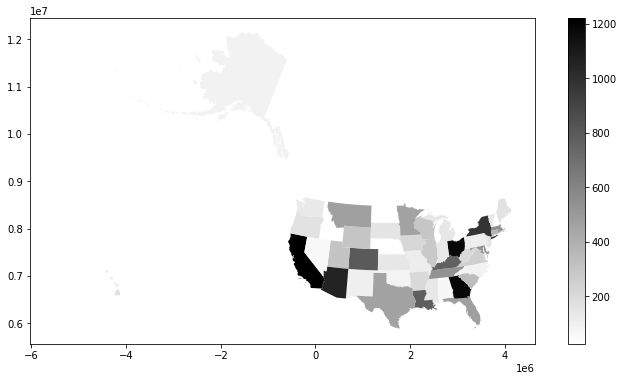

In [46]:
to_graph.to_crs("EPSG:3082").plot(column="Likes",legend=True,
    figsize=(12, 6),
    cmap="binary",)


<Axes: >

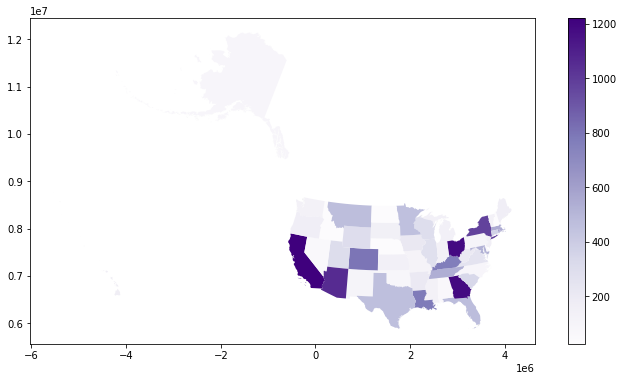

In [42]:
average = comb[comb["Name"] != "Bernie Sanders"].groupby("State")["Likes"].mean()
to_graph = us_states.merge(average, left_on=("NAME"), right_on=average.index)
to_graph.to_crs("EPSG:3082").plot(column="Likes",legend=True,
    figsize=(12, 6),
    cmap="Purples")